<a href="https://colab.research.google.com/github/chetankhairnar05/Colab/blob/main/deepLearnCustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd


In [13]:
df = pd.read_csv('/content/customer_churn_dataset-testing-master.csv')
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [14]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df['Churn'].value_counts()

,count
Churn,
0,33881
1,30493


In [17]:
df['Gender'].value_counts()

,count
Gender,
Female,34353
Male,30021


In [18]:
df['Subscription Type'].value_counts()

,count
Subscription Type,
Standard,21502
Basic,21451
Premium,21421


In [19]:
df['Contract Length'].value_counts()

,count
Contract Length,
Monthly,22130
Annual,21410
Quarterly,20834


In [20]:
df.drop(columns=['CustomerID'],inplace=True)

In [21]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [22]:
df = pd.get_dummies(df, columns=['Gender', 'Subscription Type', 'Contract Length'], drop_first=True)
df.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,22,25,14,4,27,598,9,1,False,False,False,True,False
1,41,28,28,7,13,584,20,0,False,False,True,True,False
2,47,27,10,2,29,757,21,0,True,True,False,False,False
3,35,9,12,5,17,232,18,0,True,True,False,False,True
4,53,58,24,9,2,533,18,0,False,False,True,False,False


In [23]:
df.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,22,25,14,4,27,598,9,1,False,False,False,True,False
1,41,28,28,7,13,584,20,0,False,False,True,True,False
2,47,27,10,2,29,757,21,0,True,True,False,False,False
3,35,9,12,5,17,232,18,0,True,True,False,False,True
4,53,58,24,9,2,533,18,0,False,False,True,False,False


In [24]:
df[['Gender_Male', 'Subscription Type_Premium', 'Subscription Type_Standard', 'Contract Length_Monthly', 'Contract Length_Quarterly']] = df[['Gender_Male', 'Subscription Type_Premium', 'Subscription Type_Standard', 'Contract Length_Monthly', 'Contract Length_Quarterly']].astype(int)
df.head()


,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,22,25,14,4,27,598,9,1,0,0,0,1,0
1,41,28,28,7,13,584,20,0,0,0,1,1,0
2,47,27,10,2,29,757,21,0,1,1,0,0,0
3,35,9,12,5,17,232,18,0,1,1,0,0,1
4,53,58,24,9,2,533,18,0,0,0,1,0,0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x = df.drop(columns=['Churn'])
y = df['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42 )

In [26]:
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [28]:
model = Sequential()
model.add(Dense(3, activation='relu', input_dim=x_train.shape[1]))#11 -> 3 hidden layer
model.add(Dense(1, activation='sigmoid')) #3 ->1 hidden layer
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            39 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43 (172.00 B)

 Trainable params: 43 (172.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(x_train_scaled, y_train, epochs=20, batch_size=32,validation_split=0.2)

Epoch 1/20
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6288 - loss: 0.6848 - val_accuracy: 0.8341 - val_loss: 0.4498
Epoch 2/20
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8281 - loss: 0.4401 - val_accuracy: 0.8348 - val_loss: 0.3992
Epoch 3/20
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8343 - loss: 0.3978 - val_accuracy: 0.8344 - val_loss: 0.3796
Epoch 4/20
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8400 - loss: 0.3760 - val_accuracy: 0.8545 - val_loss: 0.3490
Epoch 5/20
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8504 - loss: 0.3509 - val_accuracy: 0.8589 - val_loss: 0.3293
Epoch 6/20
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8557 - loss: 0.3330 - val_accuracy: 0.8629 - val_loss: 0.3196
Epoch 7/20
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8569 - loss: 0.3254 - val_accuracy: 0.8648 - val_loss: 0.3134
Epoch 8/20
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8620 - loss: 0.3157 - 

In [36]:
model.layers[0].get_weights()

[array([[-5.9309188e-02,  6.2810892e-01, -5.4606948e-02],
        [-2.3940150e-01, -2.2504635e-01,  1.0356365e+00],
        [ 4.2843428e-02, -1.9311994e+00,  3.2157028e-01],
        [-2.6771218e-01,  3.1326503e-01,  1.1556604e+00],
        [ 9.4769800e-01, -1.2024844e-01,  1.6195017e+00],
        [-4.6837127e-01, -7.5386614e-02,  1.4539262e-02],
        [ 8.4318605e-04,  2.0926950e-02, -3.7425537e-02],
        [-1.3393860e+00,  5.1807255e-02, -1.0364550e-01],
        [-7.7056768e-03, -8.3229519e-02,  2.5041850e-02],
        [-2.1226769e-02, -7.2322242e-02,  2.3207905e-02],
        [ 4.1075033e-01, -2.3802270e-01,  8.1022382e-02],
        [ 8.2537858e-03, -1.6025297e-01,  5.5884976e-02]], dtype=float32),
 array([-1.4268782 , -0.86846584,  0.9172417 ], dtype=float32)]

In [37]:
model.layers[1].get_weights()

[array([[3.149424 ],
        [1.4226832],
        [1.5874255]], dtype=float32),
 array([-3.8378668], dtype=float32)]

In [38]:
y_log = model.predict(x_test_scaled)
y_log

604/604 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.02108533],
       [0.02108533],
       [0.7676095 ],
       ...,
       [0.0571585 ],
       [0.9015217 ],
       [0.90663326]], dtype=float32)

In [39]:
import numpy as np
y_pred = np.where(y_log>0.5,1,0)
y_pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [1]])

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8687412623621394

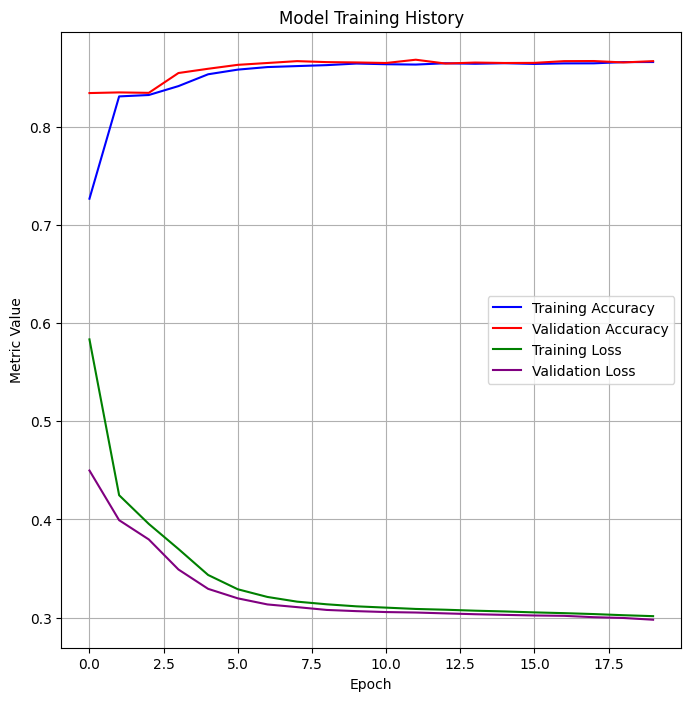

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], color='blue', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='red', label='Validation Accuracy')
plt.plot(history.history['loss'], color='green', label='Training Loss')
plt.plot(history.history['val_loss'], color='purple', label='Validation Loss')

plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()